# CHAPTER17 하이퍼파라미터와 튜닝(1)

## 17.1 하이퍼파라미터와 튜닝

- 하이퍼파라미터 : 모델을 학습시킬 때 사람이 직접 조정해야 하는 파라미터. 이 파라미터를 조정하는 것을 튜닝이라 한다
- 조정 방법은 모델에 직접 값을 입력하는 것 외에도 하이퍼파라미터값의 범위를 지정함으로써 최적의 값을 찾아내는 방법도 있다

## 17.2 로지스틱 회귀의 하이퍼파라미터

### 17.2.1 파라미터 C

- 로지스틱 회귀에는 C라는 파라미터가 있다
- C : 모델이 학습하는 식별 경계선을 지도 데이터의 분류 오류에 대해 얼마나 엄격하게 규제할지 나타내는 지표
- C값이 클수록 모델은 지도 데이터를 완전히 분류할 수 있는 식별 경계선을 학습한다
- 지도 데이터를 과학습하여 훈련 데이터 이외에 데이터까지 예측을 수행하여 정확도가 떨어지는 경우가 많다
- C값을 작게 설정하면 지도 데이터의 분류 오류에 관대해진다
- 빗나간 값이 적은 데이터에서는 경계선을 잘 식별하지 못하는 경우도 있다

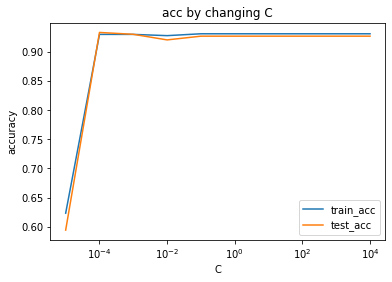

In [5]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X,y = make_classification(n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

C_list = [10 ** i for i in range(-5,5)]

train_acc = []
test_acc = []

for C in C_list:
    model = LogisticRegression(C=C, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.semilogx(C_list, train_acc, label='train_acc')
plt.semilogx(C_list, test_acc, label='test_acc')
plt.title('acc by changing C')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### 17.2.2 파라미터 penalty

- C는 분류 오류의 허용도를 나타낸다면 penalty는 모델의 복잡성에 대한 페널티를 나타낸다
- penalty에는 L1, L2 를 입력할 수 있다
- L1 : 데이터의 특징량을 줄임으로써 식별 경계선의 일반화를 도모하는 페널티
- L2 : 데이터 전체의 가중치를 줄임으로써 식별 경계선의 일반화를 도모하는 페널티

### 17.2.3 파라미터 multi_class

- multi_class는 다중 분류에서 모델의 동작을 결정하는 파라미터
- 로지스틱 회귀에는 ovr, multinomial 두가지가 있다
- ovr : 클래스에 대해 '속하는/속하지 않는' 두 값으로 답하는 문제에 적합
- multinomial : 각 클래스로 분류될 확률도 고려되어 '속하는/속하지 않는' 뿐 아니라 '속할 가능성이 얼마인가'를 다루는 문제에 적합

### 17.2.4 파라미터 random_state

- 모델은 학습시 데이터를 임의 순서로 처리한다
- random_state는 그 순서를 제어하는 파라미터
- 동일한 random_state를 주면 학습 결과를 고정할 수 있다
- 실제로 구현시 데이터의 재현성을 생각하여 random_state값을 고정하는 것이 좋다

## 17.3 선형 SVM의 하이퍼파라미터

### 17.3.1 파라미터 C

- SVM에도 로지스틱 회귀처럼 분류 오류의 허용 오차를 나타내는 C가 있다
- SVM은 로지스틱 회귀에 비해 C에 의한 데이터 라벨의 예측치 변동이 심하다

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


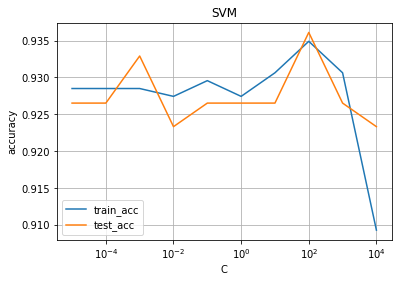

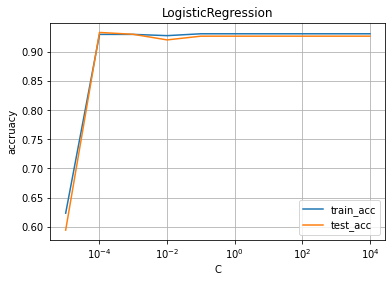

In [9]:
from tables.file import lrucacheextension
from sklearn.svm import LinearSVC


X,y = make_classification(n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

C_list = [10 ** i for i in range(-5,5)]

svm_train_acc = []
svm_test_acc = []
log_train_acc = []
log_test_acc = []

for C in C_list:
    lr = LogisticRegression(C=C, random_state=42)
    svc = LinearSVC(C=C, random_state=42)
    lr.fit(X_train, y_train)
    svc.fit(X_train, y_train)
    log_train_acc.append(lr.score(X_train, y_train))
    log_test_acc.append(lr.score(X_test, y_test))
    svm_train_acc.append(svc.score(X_train, y_train))
    svm_test_acc.append(svc.score(X_test, y_test))


fig = plt.figure()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
ax = fig.add_subplot(1,1,1)
ax.grid(True)
ax.set_title('SVM')
ax.set_xlabel('C')
ax.set_ylabel('accuracy')
ax.semilogx(C_list, svm_train_acc, label='train_acc')
ax.semilogx(C_list, svm_test_acc, label='test_acc')
ax.legend()
ax.plot()
plt.show()


fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
ax2.grid(True)
ax2.set_title('LogisticRegression')
ax2.set_xlabel('C')
ax2.set_ylabel('accruacy')
ax2.semilogx(C_list, log_train_acc, label='train_acc')
ax2.semilogx(C_list, log_test_acc, label='test_acc')
ax2.legend()
ax2.plot()
plt.show()



### 17.3.2 파라미터 penalty

- 데이터 요소가 A,B,C,D 4종류이고 라벨이 D일때 
  
  => B=2A, C=A의 관계가 있을 때, L1 페널티는 B와 C의 가중치를 줄이고 A만으로 모델에 설명하도록 작동한다

- L1 페널티는 주성분을 추출하는 기능이 있다
- L2 페널티는 특정 상관성을 보지 않고 데이터 전체의 관계를 이용하여 모델에 설명하려 한다

### 17.3.3 파라미터 multi_class

- ovr, crammer_singer 두 값이 있는데 기본적으로 ovr이 동작이 가볍고 결과가 좋다

### 17.3.4 파라미터 random_state

- 결과를 고정하는데 사용하는 숫자값은 무엇이든 좋다
- random_state는 값이 다르면 차이가 날 수 있다. 특히 데이터가 흩어져 있는 경우 서포트 벡터의 선택이 달라지기 때문에 경계선에 큰 영향을 준다

## 17.4 비선형 SVM의 하이퍼파라미터

### 17.4.1 파라미터 C

- 비선형 데이터의 경우 SVM의 SVC모듈을 사용한다


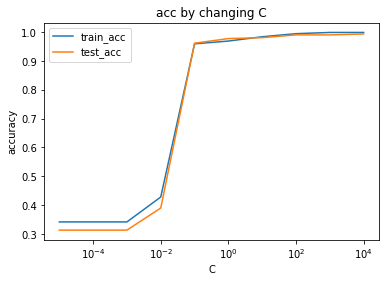

In [10]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.svm import SVC

X,y = make_gaussian_quantiles(n_samples=1250, n_features=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

C_list = [10**i for i in range(-5,5)]

train_acc = []
test_acc = []

for c in C_list:
    model = SVC(C=c, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.semilogx(C_list, train_acc, label='train_acc')
plt.semilogx(C_list, test_acc, label='test_acc')
plt.title('acc by changing C')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()
plt.show() 

### 17.4.2 파라미터 kernel

- kernel은 비선형 SVM에서 특히 중요한 파라미터로, 받아들인 데이터를 조작하여 분류하기 쉬운 형태로 만들어주는 함수를 정의하는 파라미터
- 기본은 rbf이며 linear, tbf, poly, sigmoid, precomputed 다섯개가 존재
- Linear는 선형 SVM, Linear를 쓰는것보단 LinearSVC를 쓰는것이 좋다
- rbf, poly는 입체 투영과 같음. 다른 것에 비해 상대적으로 높은 정확도가 나옴
- precomputed는 데이터 전처리로 미리 가공된 경우에 사용
- sigmoid는 로지스틱 회귀 모델과 동일한 작업을 수행

### 17.4.3 파라미터 decision_function_shape

- SCV의 multi_class파라미터와 같음. ovo와 ovr 두개가 존재
- ovo는 클래스끼리의 페어를 만들고, 그 페어에서 이항 분류를 실시해 다수결로 속하는 클래스를 결정한다. 계산량이 많고 데이터가 증가함에 따라 동작이 무거워진다
- ovr는 하나의 클래스와 그 외로 분류하여 다수결에 속하는 클래스를 결정한다

### 17.4.4 파라미터 random_state

In [11]:
import numpy as np

random_state = np.random.RandomState()

model = SVC(random_state = random_state)

In [13]:
X,y = make_classification(n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

random_state = np.random.RandomState()

model = SVC(random_state = random_state)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9488817891373802

In [15]:
X,y = make_classification(n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

k_list = ['linear', 'rbf', 'poly', 'sigmoid']

for i in k_list:
    model = SVC(kernel=i, random_state=42)
    model.fit(X_train, y_train)

    print(i)
    print(model.score(X_test, y_test))
    print()

linear
0.9329073482428115

rbf
0.9488817891373802

poly
0.9361022364217252

sigmoid
0.9265175718849841

